In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Select a dataset to insepct by commenting out:

#df = pd.read_feather('data/raw/2018-citibike-tripdata.feather')
#df = pd.read_feather('data/intermediate/cleaned_data.feather')
#df = pd.read_feather('data/intermediate/balanced_data.feather')
df = pd.read_feather('data/intermediate/feature_data.feather')


In [26]:
# inspect nan values
df.isnull().sum()

tripduration          0
start_station_id      0
start_station_lat     0
start_station_long    0
end_station_id        0
end_station_lat       0
end_station_long      0
bikeid                0
usertype              0
birth_year            0
gender                0
month                 0
day                   0
time                  0
dtype: int64

In [27]:
# inspect the columns
df.dtypes

tripduration            int64
start_station_id        int64
start_station_lat     float64
start_station_long    float64
end_station_id          int64
end_station_lat       float64
end_station_long      float64
bikeid                  int64
usertype               object
birth_year              int64
gender                  int64
month                   int32
day                     int32
time                    int32
dtype: object

In [28]:
# number of rows
len(df.index)

3858944

In [29]:
# inspect  some example rows
df.head()

,tripduration,start_station_id,start_station_lat,start_station_long,end_station_id,end_station_lat,end_station_long,bikeid,usertype,birth_year,gender,month,day,time
0,1844,3150,40.775369,-73.948034,514,40.760875,-74.002777,33461,Subscriber,1969,2,4,1,7
1,1863,161,40.729170,-73.998102,3233,40.757246,-73.978059,20004,Customer,1990,1,10,2,20
2,227,3443,40.761330,-73.979820,457,40.766953,-73.981693,32256,Subscriber,1974,1,1,4,11
3,1336,478,40.760301,-73.998842,3002,40.711512,-74.015756,33451,Customer,1969,0,10,6,16
4,5977,3254,40.692317,-74.014866,3254,40.692317,-74.014866,18503,Customer,1969,0,7,4,11


In [30]:
# inspect mean values
df.describe()

,tripduration,start_station_id,start_station_lat,start_station_long,end_station_id,end_station_lat,end_station_long,bikeid,birth_year,gender,month,day,time
count,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06,3.858944e+06
mean,1.217489e+03,1.645958e+03,4.073850e+01,-7.398276e+01,1.637420e+03,4.073809e+01,-7.398304e+01,2.602352e+04,1.977535e+03,8.793774e-01,7.060477e+00,3.162319e+00,1.412695e+01
std,2.157152e+03,1.440333e+03,3.159898e-02,1.951307e-02,1.438724e+03,3.140809e-02,1.951715e-02,6.308085e+03,1.129875e+01,7.032062e-01,2.744196e+00,2.006633e+00,4.568475e+00
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.919000e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.690000e+02,3.830000e+02,4.071606e+01,-7.399667e+01,3.860000e+02,4.071602e+01,-7.399705e+01,1.967200e+04,1.969000e+03,0.000000e+00,5.000000e+00,1.000000e+00,1.100000e+01
50%,8.720000e+02,5.160000e+02,4.073936e+01,-7.398516e+01,5.140000e+02,4.073932e+01,-7.398565e+01,2.766100e+04,1.975000e+03,1.000000e+00,7.000000e+00,3.000000e+00,1.500000e+01
75%,1.464000e+03,3.255000e+03,4.076123e+01,-7.397121e+01,3.255000e+03,4.076088e+01,-7.397137e+01,3.145400e+04,1.988000e+03,1.000000e+00,9.000000e+00,5.000000e+00,1.800000e+01
max,8.638500e+04,3.721000e+03,4.081439e+01,-7.390774e+01,3.721000e+03,4.081439e+01,-7.390774e+01,3.580600e+04,2.002000e+03,2.000000e+00,1.200000e+01,6.000000e+00,2.300000e+01


In [31]:
# distribution of gender
df.groupby(['gender']).size().reset_index(name='counts')

,gender,counts
0,0,1214933
1,1,1894554
2,2,749457


In [32]:
# distribution of usertype
df.groupby(['usertype']).size().reset_index(name='counts')

,usertype,counts
0,Customer,1929472
1,Subscriber,1929472


In [33]:
# distribution of usertype and gender
df.groupby(['usertype', 'gender']).size().reset_index(name='counts')

,usertype,gender,counts
0,Customer,0,1177920
1,Customer,1,472438
2,Customer,2,279114
3,Subscriber,0,37013
4,Subscriber,1,1422116
5,Subscriber,2,470343


/tmp/ipykernel_413/2191144628.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(9, 2, i)
/tmp/ipykernel_413/2191144628.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(9, 2, i)


ValueError: num must be an integer with 1 <= num <= 18, not 19

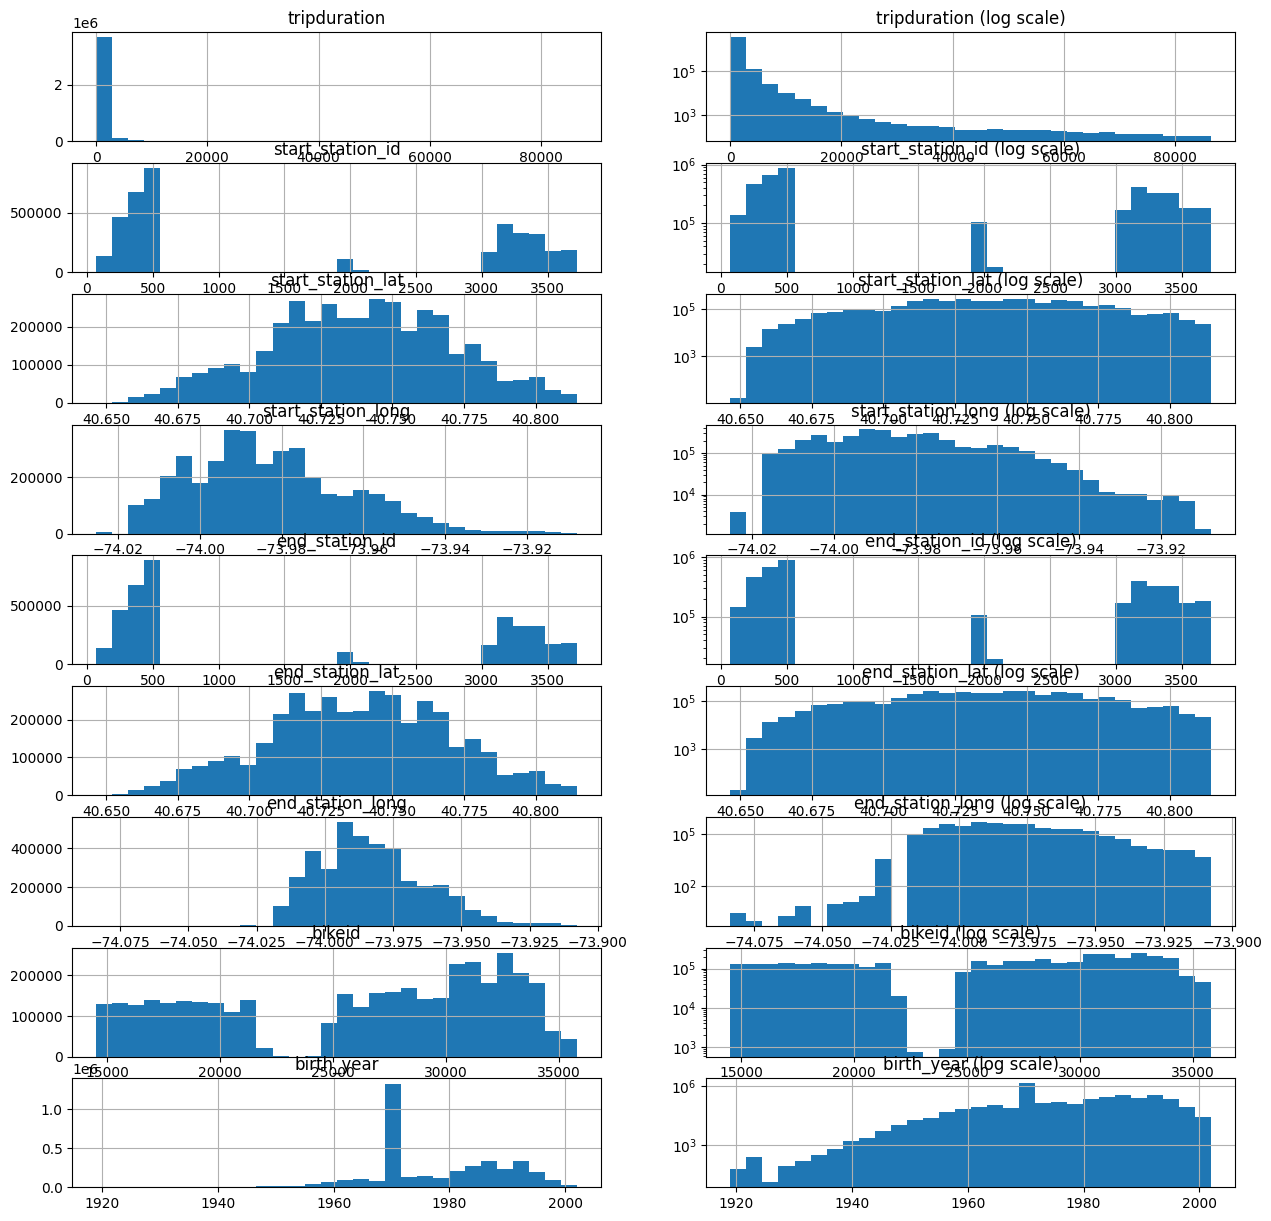

In [37]:

# plot values to identify outliers
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(15,15))

i = 1
for col in df.columns:
    if (df[col].dtype == np.float64 or df[col].dtype == np.int64 or df[col].dtype == np.int32) and col != 'gender':
        ax = plt.subplot(12, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col)
        i += 1
        ax = plt.subplot(12, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col+" (log scale)")
        ax.set_yscale('log')
        i += 1

fig.tight_layout()
plt.show()